In [44]:
from include import *
from data import *
import builtins
from sklearn.preprocessing import MinMaxScaler
# import deepreload
from Cope import debug
%load_ext autoreload
data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/cereal.csv')
# For when we need a lot of samples
bigData = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')


relevant = ('mfr', 'fat', 'calories', 'name', 'rating')
target = 'rating'

[autoreload of data failed: Traceback (most recent call last):
  File "/home/leonard/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/leonard/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/home/leonard/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/leonard/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 289, in update_function
    setattr(old, name, getattr(new, name))
ValueError: evaluateQuantitative() requires a code object with 0 free vars, not 1
]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2
explore(data)
# len(data)

GridBox(children=(Dropdown(description='Select Summary', options=('Description', 'Features', 'Head', 'Stats', …

Output()

In [8]:

# print('Before decorator defined')
def decorator(decorator_arg, decorator_kwarg=None):
    # print('Called when decorator is added')
    # print('params are:', decorator_arg)
    def outer(decorator_func):
        # print('Also called when decorator is added?')
        @wraps(decorator_func)
        def inner(*args, **kwargs):
            # print('Called when func is. params are:', args)
            rtn = decorator_func(*args, **kwargs)
            return rtn
        return inner
    return outer
# print('After decorator defined')

# print('Before func defined')
@decorator(30.0, 'foobarbaz')
def func(a, b, c):
    # print('Just inside func')
    return a + b + c
# print('After func defined')


# print('Before func called')
func(1, 2, 3)
# print('After func called')

Before decorator defined
After decorator defined
Before func defined
Called when decorator is added
params are: 30.0
Also called when decorator is added?
After func defined
Before func called
Called when func is. params are: (1, 2, 3)
Just inside func
After func called


In [11]:

def decorator(decorator_arg, decorator_kwarg=None):
    # Runs when the decorator is added
    def outer(decorator_func):
        # Also runs when the decorator is added
        # This decorator just helps the interpreter know what's what
        @wraps(decorator_func)
        def inner(*args, **kwargs):
            # Runs when the decorated function gets called
            rtn = decorator_func(*args, **kwargs)
            return rtn
        return inner
    return outer

@decorator(30.0, 'foobarbaz')
def func(a, b, c):
    return a + b + c

func(1, 2, 3,)

6

In [84]:

@_cleaningFunc(df=pd.DataFrame)
def func(df, log=...):
    log(type(df))
    display(df)

func((data.mfr, ), verbose=True)

	<class 'pandas.core.frame.DataFrame'>


,mfr
0,N
1,Q
2,K
3,K
4,R
...,...
72,G
73,G
74,R
75,G


In [9]:
%autoreload 2
# disp(split(data, amt=.1, target=['rating', 'weight']))
rating = data.copy().pop('rating')
# disp(split(data, rating, amt=.1))
# a, b = split(data, method='tail', amt=.5, splitTargets=True)
# disp((a, b))
disp(split(data, amt=.1, method='random', target=['rating', 'weight', 'sodium', 'fat'], splitTargets=True))
# display(a)
# display(b)

# train_X_a, test_X_a, train_y, test_y, train_y1, test_y1, train_X1, test_X1, 

# data['date'] = parse_date(data.dteday)
# convert_time(data)
# data

# _data = convert_numeric(data.drop(columns=['name']))
# normalize(_data)

{


,name,mfr,type,calories,protein,fiber,carbo,sugars,potass,vitamins,shelf,cups
50,Nutri-grain Wheat,K,C,90,3,3.0,18.0,2,90,25,3,1.00
28,Fruitful Bran,K,C,120,3,5.0,14.0,12,190,25,3,0.67
68,Strawberry Fruit Wheats,N,C,90,2,3.0,15.0,5,90,25,2,1.00
74,Wheat Chex,R,C,100,3,3.0,17.0,3,115,25,1,0.67
18,Count Chocula,G,C,110,1,0.0,12.0,13,65,25,2,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
20,Cream of Wheat (Quick),N,H,100,3,1.0,21.0,0,-1,0,2,1.00
60,Raisin Squares,K,C,90,2,2.0,15.0,6,110,25,3,0.50
71,Total Whole Grain,G,C,100,3,3.0,16.0,3,110,100,3,1.00
14,Cocoa Puffs,G,C,110,1,0.0,12.0,13,55,25,2,1.00


,name,mfr,type,calories,protein,fiber,carbo,sugars,potass,vitamins,shelf,cups
4,Almond Delight,R,C,110,2,1.0,14.0,8,-1,25,3,0.75
35,Honey Graham Ohs,Q,C,120,1,1.0,12.0,11,45,25,2,1.00
10,Cap'n'Crunch,Q,C,120,1,0.0,12.0,12,35,25,2,0.75
0,100% Bran,N,C,70,4,10.0,5.0,6,280,25,3,0.33
45,Muesli Raisins; Peaches; & Pecans,R,C,150,4,3.0,16.0,11,170,25,3,1.00
47,Multi-Grain Cheerios,G,C,100,2,2.0,15.0,6,90,25,1,1.00
66,Smacks,K,C,110,2,1.0,9.0,15,40,25,2,0.75
53,Product 19,K,C,100,3,1.0,20.0,3,45,100,3,1.00


50    59.642837
28    41.015492
68    59.363993
74    49.787445
18    22.396513
        ...    
20    64.533816
60    55.333142
71    46.658844
14    22.736446
51    30.450843
Name: rating, Length: 69, dtype: float64

4     34.384843
35    21.871292
10    18.042851
0     68.402973
45    34.139765
47    40.105965
66    31.230054
53    41.503540
Name: rating, dtype: float64

50    1.00
28    1.33
68    1.00
74    1.00
18    1.00
      ... 
20    1.00
60    1.00
71    1.00
14    1.00
51    1.25
Name: weight, Length: 69, dtype: float64

4     1.0
35    1.0
10    1.0
0     1.0
45    1.0
47    1.0
66    1.0
53    1.0
Name: weight, dtype: float64

50    170
28    240
68     15
74    230
18    180
     ... 
20     80
60      0
71    200
14    180
51    170
Name: sodium, Length: 69, dtype: int64

4     200
35    220
10    220
0     130
45    150
47    220
66     70
53    320
Name: sodium, dtype: int64

50    0
28    0
68    0
74    1
18    1
     ..
20    0
60    0
71    1
14    1
51    2
Name: fat, Length: 69, dtype: int64

4     2
35    2
10    2
0     1
45    3
47    1
66    1
53    0
Name: fat, dtype: int64

}


In [36]:
# handle_outliers
# handle_missing
# remove
# bin
%autoreload 2
# data = convert_numeric(data.mfr, col=None, method='one_hot_encode')
# data
# rescale()
d = bigData.drop(columns=['dteday'])
rescale(df=split(d, amt=.2, method='chunk'))
# d

TypeError: _cleaning_func.<locals>.outer.<locals>.inner() missing 1 required positional argument: 'dat'

In [10]:
%autoreload 2
col = data['sodium']
# handle_outliers(col, method='remove', zscore=1, verbose=True)
# print(data.mfr)
# print(data.rating)
# handle_outliers(col, method='constrain', zscore=3, verbose=True)
# handle_missing(col, np.nan, missing_value=200, verbose=True)
# handle_missing(col, method:Union[Series, 'remove', 'mean', 'median', 'mode', 'random', 'balanced_random', Any], missing_value=np.nan, verbose=True)
# query(data, 'sodium', 'sodium > 200', 4, verbose=True)
# query(df:pd.DataFrame, column:str, query:str, method:Union[Series, 'remove', 'mean', 'median', 'mode', 'random', 'balanced_random', Any], verbose=True)
# query(data, 'healthy', 'fat < 3 & calories < 100', 'new', false='unhealthy', true='healthy')
# remove(col, 200, verbose=True)
# bin(col, (0, 90, 150, 1000), amt=5, verbose=True)
# bin(col, method:Union['frequency', 'width', Tuple, List], amt=5, verbose=True)
# normalize(col, verbose=True)
# convert_numeric(data, 'sodium', method:Union['assign', 'one_hot_encode']='one_hot_encode', returnAssignments=False, verbose=True)
# convert_numeric(data, method='one_hot_encode', returnAssignments=False, verbose=True)

In [ ]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
%autoreload 2
explore(data, target=target, start='Description', startFeature=None)
# quantitative(data)

GridBox(children=(Dropdown(description='Select Summary', options=('Description', 'Features', 'Head', 'Stats', …

Output()

In [ ]:
pd.Series(pd.Series([1, 2, 3], name='a'), name='b')

0    1
1    2
2    3
Name: b, dtype: int64

In [ ]:
%autoreload 2
'''
config = {
    # Do these to all the columns, or a specified column
    'all': {
        # If provided, specifies a method by which to convert a catagorical feature to a quantative one
        'drop_duplicates': True,
        'normalize': 'min-max',
        'convert_numeric': 'one_hot_encode',
        # If provided, specifies a method by which to normalize the quantative values
        # Drop duplicate samples
        # If provided, specifies a value that is equivalent to the feature being missing
        # 'missing_value': Any,
        # If provided, specifies a method by which to transform samples with missing features
        # 'handle_missing': Union[bool, 'remove', 'mean', 'median', 'mode', Any],
        # If provided, specifies a method by which to bin the quantative value, or specify custom ranges
        # 'bin': Union[bool, Tuple['frequency', int], Tuple['width', int], Iterable],
        # If provided, maps feature values to a dictionary
        # 'map': Union[bool, Dict],
        # If provided, removes all samples with the given value
        # 'remove': Union[bool, Any],
        # If provided, applies a function to the column
        # 'apply': Union[bool, Callable],
        # A ndarray of shape (1, n) of bools to apply to the column to create a new column with the given name
        # Usable on single columns only (not all)
        # 'create_new': Tuple[str, np.ndarray],
    },
    'calories': {
        # 'drop_duplicates': False,
        'missing_value': 70,
        'handle_missing': 'mean',
        # 'normalize': 'range',
        'bin': ('frequency', 7),
        # 'map': Union[bool, Dict],
        # 'remove': True,
        'convert_numeric': 'assign',
        # 'apply': Union[bool, Callable],
        # 'create_new': Tuple[str, np.ndarray],
    },
    'name': {
        # 'normalize': 'range',
        'drop_duplicates': False,
        'remove': 'Almond Delight',
        'convert_numeric': 'one_hot_encode',
        # 'missing_value': Any,
        # 'handle_missing': Union[bool, 'remove', 'mean', 'median', 'mode', Any],
        # 'bin': Union[bool, Tuple['frequency', int], Tuple['width', int], Iterable],
        # 'map': Union[bool, Dict],
        # 'remove': True,
        # 'apply': Union[bool, Callable],
        # 'create_new': Tuple[str, np.ndarray],
    },
    'fat': {'drop': True}
} 
'''
config = {
        # Do these to all the columns, or a specified column
        'all': {
            # Drop the column
            # 'drop': True,
            # Drop duplicate samples
            # 'drop_duplicates': True,
            # If provided, maps feature values to a dictionary
            # 'replace': {
            #     0: 9999,
            #     'K': 'NOT K',
            #     8: 1000
            # },
            # If provided, applies a function to the column
            # 'apply': lambda a: 'HERE' if a == 'K' else a,
            # If provided, specifies a value that is equivalent to the feature being missing
            # 'missing_value': 3,
            # If provided, specifies a method by which to transform samples with missing features
            # 'handle_missing': Union[bool, 'remove', 'mean', 'median', 'mode', Any],
            # 'handle_missing': 'balanced_random',
            
            # If provided, specifies a method by which to bin the quantative value, or specify custom ranges
            # 'bin': Union[bool, Tuple['frequency', int], Tuple['width', int], Iterable],
            # 'bin': (0, 50, 80, 200),
            # If provided, removes all samples with the given value
            # 'remove': 'K',
            # A ndarray of shape (1, n) of bools to apply to the column to create a new column with the given name
            'add_column': ('yo mamas potass', data['potass'][data['potass'] > 200]),
            # If provided, specifies a method by which to normalize the quantative values
            # 'normalize': Union[bool, 'min-max', 'range'],
            # 'normalize': True,
            # If provided, specifies a method by which to convert a catagorical feature to a quantative one
            # 'convert_numeric': Union[bool, 'assign', 'one_hot_encode'],
            # 'convert_numeric': 'one_hot_encode',
    },
        'mfr': {
            # Drop the column
            # 'drop': False,
            # Drop duplicate samples
            # 'drop_duplicates': False,
            # If provided, maps feature values to a dictionary
            # 'replace': False,
            # If provided, applies a function to the column
            # 'apply': False,
            # If provided, specifies a value that is equivalent to the feature being missing
            # 'missing_value': 'K',
            # If provided, specifies a method by which to transform samples with missing features
            # 'handle_missing': Union[bool, 'remove', 'mean', 'median', 'mode', Any],
            # 'handle_missing': data.type,
            # If provided, specifies a method by which to bin the quantative value, or specify custom ranges
            # 'bin': Union[bool, Tuple['frequency', int], Tuple['width', int], Iterable],
            # 'bin': (0, 50, 80, 200),
            # If provided, removes all samples with the given value
            # 'remove': 'K',
            # A ndarray of shape (1, n) of bools to apply to the column to create a new column with the given name
            # 'add_column': ('yo mamas potass', data['potass'][data['potass'] > 200]),
            # If provided, specifies a method by which to normalize the quantative values
            # 'normalize': Union[bool, 'min-max', 'range'],
            # 'normalize': True,
            # If provided, specifies a method by which to convert a catagorical feature to a quantative one
            # 'convert_numeric': Union[bool, 'assign', 'one_hot_encode'],
            # 'convert_numeric': False,
            # 'queries': False
        },
    'fiber':{
        'queries': ('calories > 100', data.protein),
    },
    'name':{'convert_numeric':'assign'}
}

# unclean = insertSample(data, data.iloc[1], index=0)
unclean = data.copy()
display(unclean.head())
clean(unclean, config, verbose=True).head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Working on "mfr"
Working on "fiber"
	Changing all samples where "calories > 100" is true to have the fiber values of their indecies in "protein"
Working on "name"
	Converting "name" to quantatative by assinging to arbitrary values
Working on "all"
	Adding new column "yo mamas potass"
	Excluding column name from convert_numeric
	Excluding column fiber from queries


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,yo mamas potass
0,0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,280.0
1,1,Q,C,120,3,5,15,3.0,8.0,8,135,0,3,1.0,1.00,33.983679,NaN
2,2,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,320.0
3,3,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,330.0
4,4,R,C,110,2,2,200,2.0,14.0,8,-1,25,3,1.0,0.75,34.384843,NaN


In [ ]:
%autoreload 2

# data.name._get_numeric_data()   
_catagoricalTypes = ['bool', 'bool_', 'object', 'object_', 'Interval', 'bool8', 'category']
_quantitativeTypes = ['number']
_timeTypes = ['datetimetz', 'timedelta', 'datetime']
# data.select_dtypes(include=_quantitativeTypes)
# data.select_dtypes(include=_catagoricalTypes)
# data.select_dtypes(include=_timeTypes)
assert np.all(data.select_dtypes(include=_catagoricalTypes) == data.select_dtypes(exclude=_quantitativeTypes))
assert np.all(data.select_dtypes(exclude=_catagoricalTypes) == data.select_dtypes(include=_quantitativeTypes))
# data.cups.dtype
# data.cups in 
# quantataetive(data.cups)
data.cups.name in catagorical(pd.DataFrame(data.cups))

False

In [5]:
targets_file = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini_answers.csv"
targets = pd.read_csv(targets_file)
targets['actual'] = targets.casual + targets.registered
targets.drop(columns=['casual','registered'],inplace=True)

targets

,actual
0,108
1,69
2,50
3,15
4,5
5,13
6,27
7,63
8,144
9,193


In [ ]:
pred = pd.read_csv('/home/leonard/Downloads/holdoutPredictions (12).csv')
pred

Test:
	Root Mean Square Error: 107.671
	My own measure:         0.616
	Mean Absolute Error:    72.243
	Median Absolute Error:  44.045
	R^2 Score:              0.527
	Within 5%:              2.857
	Within 10%:             5.714
	Within 20%:             17.143
	Within 50%:             74.286


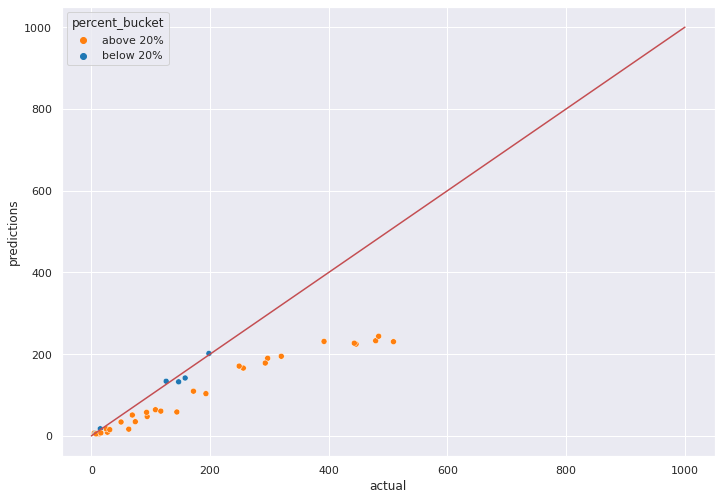

In [43]:
from data import *
%autoreload 2
from data import *
# mean_squared_error(targets, pred)
evaluateQ(targets, pred, line=True)
# (targets.astype(np.float64), pred)